In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from  torch.optim import SGD # Stochastic Gradient Decent

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Advantage of the tensor - it has accelerated art=ithmetics and automatic differenciation.

In [9]:
# Creating a new neural network means creating a new class:
# we will use a pytorch class called Module

from numpy import intp


class BasicNN(nn.Module):
    def __init__(self):
        # initialize the weight and biases.
        super().__init__() # call initialization method for parent class - nn.Module
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85),  requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8),  requires_grad=False)
        self.w10 = nn.Parameter(torch.tensor(12.6),  requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0),  requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7),  requires_grad=False)
        self.final_bias = nn.Parameter(torch.tensor(-16.0),  requires_grad=False)

        # We have defined the initial guesses of the weight and the biases.

    def forward(self, input):

        input_to_top_relu = input* self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input* self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

# To test the thing: We make a tensor having the input data.

input_doses = torch.linspace(start = 0, end = 1, steps = 11)

model = BasicNN()

output_values =model(input_doses)

<AxesSubplot:>

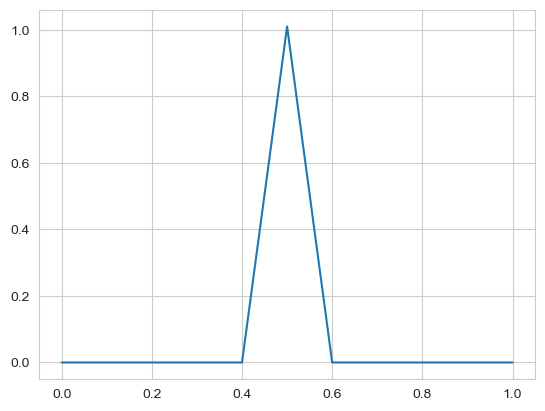

In [11]:
sns.set_style('whitegrid')
sns.lineplot(x= input_doses, y = output_values)

In [12]:
# Let's make b(final) unknown and we will try to find it;s value using backpropagatoin.

<AxesSubplot:>

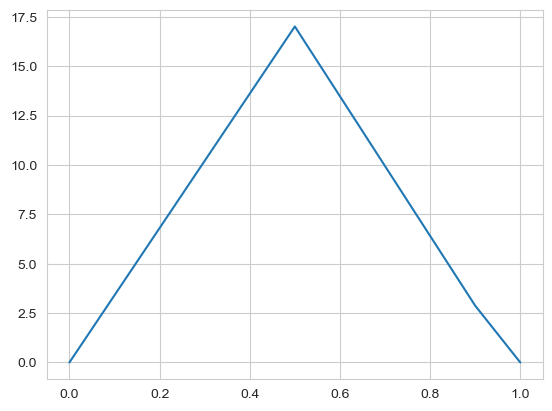

In [17]:
class BasicNN_train(nn.Module):
    def __init__(self):
        # initialize the weight and biases.
        super().__init__() # call initialization method for parent class - nn.Module
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85),  requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8),  requires_grad=False)
        self.w10 = nn.Parameter(torch.tensor(12.6),  requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0),  requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7),  requires_grad=False)
        self.final_bias = nn.Parameter(torch.tensor(0.0),  requires_grad=True) # Look we set the gradinet to be true

        # We have defined the initial guesses of the weight and the biases.

    def forward(self, input):

        input_to_top_relu = input* self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input* self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output


input_doses = torch.linspace(start = 0, end = 1, steps = 11)

model = BasicNN_train()

output_values =model(input_doses)

sns.set_style('whitegrid')
sns.lineplot(x= input_doses, y = output_values.detach()) # We put detach as y has a gradient attached with it, so we remove that.

# this graph is nuts as it shows effectiveness to be 17, so we must train the model.

<AxesSubplot:>

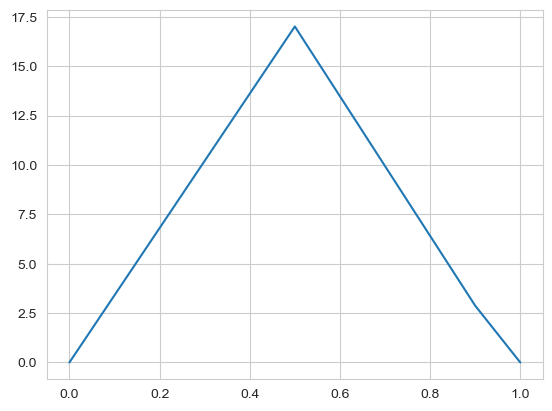

In [29]:
class BasicNN_train(nn.Module):
    def __init__(self):
        # initialize the weight and biases.
        super().__init__() # call initialization method for parent class - nn.Module
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85),  requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8),  requires_grad=False)
        self.w10 = nn.Parameter(torch.tensor(12.6),  requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0),  requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7),  requires_grad=False)
        self.final_bias = nn.Parameter(torch.tensor(0.0),  requires_grad=True) # Look we set the gradinet to be true

        # We have defined the initial guesses of the weight and the biases.

    def forward(self, input):

        input_to_top_relu = input* self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input* self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output


input_doses = torch.linspace(start = 0, end = 1, steps = 11)

inputs = torch.tensor([0, 0.5, 1])
labels = torch.tensor([0, 1, 0])

model = BasicNN_train()

output_values =model(input_doses)

sns.set_style('whitegrid')
sns.lineplot(x= input_doses, y = output_values.detach()) # We put detach as y has a gradient attached with it, so we remove that.

# this graph is nuts as it shows effectiveness to be 17, so we must train the model.




In [30]:



optimizer = SGD(model.parameters(), lr = 0.1) # it will optimise every parameter that we set grad = true
# learning rate = 0.1
print("Final bias, before optimization: " + str(model.final_bias.data) + '\n')

# each time our optimization code sees all of the trainig data - it is called epoch.
# here we will run all three of the training data 300 times.

for epoch in range(300):
    total_loss = 0

    for i in range(len(inputs)):
        input_i = inputs[i]
        label_i = labels[i]

        output_i  = model(input_i)
        loss = (output_i-label_i) ** 2

        loss.backward() # this will take a derivative of the SSR and b(final) and plugging in the predicted and the known values. The good part is, it remebers the 
        # derivative for the for iteration when it performs the second iteration. # it accumulates the derivatives each time we go through the nested loop. # 

        total_loss +=float(loss) # this is a total loss for each epoch

    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break

    optimizer.step() # this will lead the b(final) in an optimal direction.
    optimizer.zero_grad() # we need to zero-out the derivative that we are storing in the model. As now we have updated the b(final), so we can forget about the derivatives 
    # that the previous b(final) caused.

    print("Steps: " + str(epoch) + " Final Bias: " + str(model.final_bias.data) + "\n")



print("final bias, after optimization: " + str(model.final_bias.data))

Final bias, before optimization: tensor(0.)

Steps: 0 Final Bias: tensor(-3.2020)

Steps: 1 Final Bias: tensor(-5.7636)

Steps: 2 Final Bias: tensor(-7.8129)

Steps: 3 Final Bias: tensor(-9.4523)

Steps: 4 Final Bias: tensor(-10.7638)

Steps: 5 Final Bias: tensor(-11.8131)

Steps: 6 Final Bias: tensor(-12.6525)

Steps: 7 Final Bias: tensor(-13.3240)

Steps: 8 Final Bias: tensor(-13.8612)

Steps: 9 Final Bias: tensor(-14.2909)

Steps: 10 Final Bias: tensor(-14.6348)

Steps: 11 Final Bias: tensor(-14.9098)

Steps: 12 Final Bias: tensor(-15.1298)

Steps: 13 Final Bias: tensor(-15.3059)

Steps: 14 Final Bias: tensor(-15.4467)

Steps: 15 Final Bias: tensor(-15.5594)

Steps: 16 Final Bias: tensor(-15.6495)

Steps: 17 Final Bias: tensor(-15.7216)

Steps: 18 Final Bias: tensor(-15.7793)

Steps: 19 Final Bias: tensor(-15.8254)

Steps: 20 Final Bias: tensor(-15.8623)

Steps: 21 Final Bias: tensor(-15.8919)

Steps: 22 Final Bias: tensor(-15.9155)

Steps: 23 Final Bias: tensor(-15.9344)

Steps: 24

<AxesSubplot:>

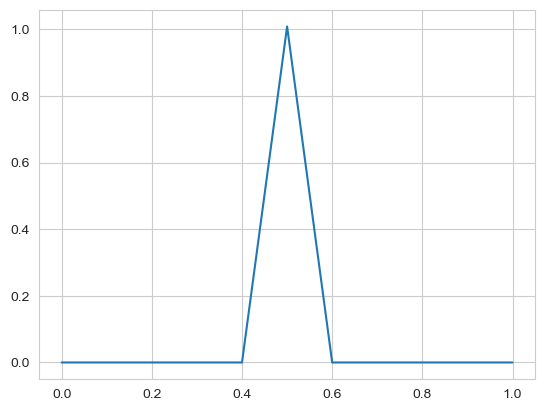

In [31]:
output_values =model(input_doses) # these are the values found using the optimized b(final) value.

sns.set_style('whitegrid')
sns.lineplot(x= input_doses, y = output_values.detach())